In [7]:
%matplotlib inline
import pymc3 as pm
import numpy.random as rng
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
n = 100
heads = 61

In [17]:
# Apply pretty styles
from IPython.core.display import HTML
path='C:\\Users\\HP\\PycharmProjects\\mds\\\hb_mc\\'
def css_styling():
    styles = open(path+"styles\\custom.css", "r").read()
    return HTML(styles)
css_styling()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://9dbb143991406a7c655e-aa5fcb0a5a4ec34cff238a2d56ca4144.r56.cf5.rackcdn.com/cmunss.otf');
    }
    @font-face {
        font-family: "Computer Modern";
        font-weight: bold;
        src: url('http://9dbb143991406a7c655e-aa5fcb0a5a4ec34cff238a2d56ca4144.r56.cf5.rackcdn.com/cmunsx.otf');
    }
    @font-face {
        font-family: "Computer Modern";
        font-style: oblique;
        src: url('http://9dbb143991406a7c655e-aa5fcb0a5a4ec34cff238a2d56ca4144.r56.cf5.rackcdn.com/cmunsi.otf');
    }
    @font-face {
        font-family: "Computer Modern";
        font-weight: bold;
        font-style: oblique;
        src: url('http://9dbb143991406a7c655e-aa5fcb0a5a4ec34cff238a2d56ca4144.r56.cf5.rackcdn.com/cmunso.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .prompt{
        display: None;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  
</style>
<script>
    MathJax.Hub.Config({
                        TeX: {
                           extensions: ["AMSmath.js"]
                           },
                tex2jax: {
                    inlineMath: [ ['$','$'], ["\\(","\\)"] ],
                    displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
                },
                displayAlign: 'center', // Change this to 'center' to center equations.
                "HTML-CSS": {
                    styles: {'.MathJax_Display': {"margin": 4}}
                }
        });
</script>

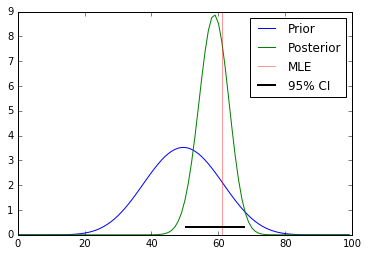

In [18]:
a, b = 10, 10
prior = stats.beta(a, b)
post = stats.beta(heads+a, n-heads+b)
ci = post.interval(0.95)

xs = np.linspace(0, 1, 100)
plt.plot(prior.pdf(xs), label='Prior')
plt.plot(post.pdf(xs), label='Posterior')
plt.axvline(100*heads/n, c='red', alpha=0.4, label='MLE')
plt.xlim([0, 100])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.legend()
pass

In [20]:
niter = 2000
with pm.Model() as coin_context:
    p = pm.Beta('p', alpha=2, beta=2)
    y = pm.Binomial('y', n=n, p=p, observed=heads)
    trace = pm.sample(niter)

In [ ]:
with coin_context:
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=4, random_seed=123)